In [ ]:
# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [3]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [4]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [5]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [6]:
"""
1. We need to load the first MID1.xls as DataFrame and use its name as indexes and the name of the document as column
2. Load the 8 next MID@I.xls and join them with the first DataFrame (some more line indexes will be added to the DataFrame too)
3. Load the metadata from the last file, and map the column name [MID1,MID2,...,MID9] to a MultiIndex: [(MID1,EC,NAN),(MID2,NEC1,tissue),...]
4. Change all the NaN created by the join operation to the tag 'unknown'
"""

"helper function to load one excel of the name MID@i"
def getMID(i):
    return pd.read_excel(DATA_FOLDER+"/microbiome/MID"+str(i)+".xls",index_col=0, sheetname='Sheet 1', header=None, names = ['MID'+str(i)])

"load all the MID.xls and join them together"
a = getMID(1)
for i in range(2,10):
    m = getMID(i)
    a = a.join(m, how='outer')
    
"split the full name of the bacterie into multiIndex"
#a.index = pd.MultiIndex.from_tuples([tuple(k.split(" ")) for k,v in a.iterrows()]) 

"load the metadata from metadata.xls"
metadata = pd.read_excel(DATA_FOLDER+"/microbiome/metadata.xls",index_col=0, sheetname='Sheet1')

"create a list of tuples from each line of the metadata"
columns = list(metadata.itertuples(index=True))

"change the column name to its real tuple name in a MultiIndex"
a.columns=pd.MultiIndex.from_tuples(columns)

"check the uniqueness of the indexes"
print("all indexes are uniques =",a.index.is_unique)

"remplace NaN to unknown"
a = a.fillna('unknown')

"print the dataFrame"
a

all indexes are uniques = True


,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
,EXTRACTION CONTROL,NEC 1,Control 1,NEC 2,Control 2,NEC 1,Control 1,NEC 2,Control 2
,NaN,tissue,tissue,tissue,tissue,stool,stool,stool,stool
0,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",unknown,unknown,1,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",unknown,2,1,unknown,2,unknown,1,unknown,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [25]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

import matplotlib.pyplot as plt

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [31]:
data_names = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
dataset = pd.read_excel(DATA_FOLDER+"/titanic.xls", index_col=None, names=data_names)
dataset.describe()
#print(dataset)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


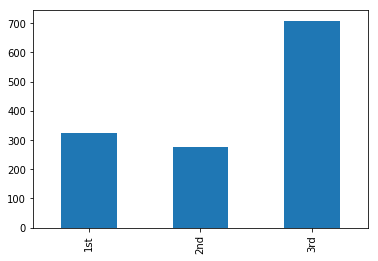

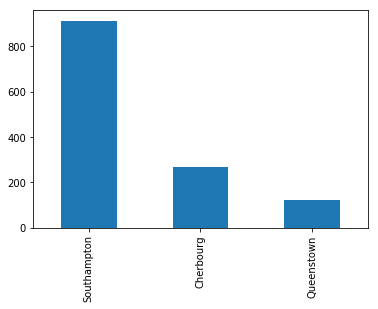

In [95]:
'''
sample = np.arange(10)[::2]
print(sample)
plt.hist(sample)
plt.show()'''

## Passenger travel class histogram
fig_pclass = plt.figure()
pclass_data = dataset['pclass']
pclass_count = pd.Series([pclass_data[pclass_data.values==pclass].apply(lambda e : 1).sum() for pclass in [1, 2, 3]])
pclass_count.index=['1st_class', '2nd_class', '3rd_class']
pclass_count.plot(kind='bar')

## Passenger embarkation port
fig_embark = plt.figure()
pemb_data = dataset['embarked']
def pemb_transform(s) :
    return {   
        'S' : 'Southampton',
        'C' : 'Cherbourg',
        'Q' : 'Queenstown'
    }.get(s, 'NULL') 
pemb_data=pemb_data.apply(pemb_transform)
embarkment_ports=['Southampton','Cherbourg', 'Queenstown' ]
count = pd.Series([pemb_data[pemb_data.values==embarkment].apply(lambda s : 1).sum() for embarkment in embarkment_ports])
count.index=embarkment_ports
count.plot(kind='bar')

plt.show()

## 1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.



__pclass__ : Type : Integer number; Range : {1-3}; Categorical; Desc : The ticket's class of a passenger : 1st class, 2nd class or 3rd class. Categorical.   
__survived__ : Type : Binary number; Range : {0, 1}; Categorical; Desc : Wether or not the passenger survived the crash.   
__name__ : Type : Char String; Range : [?]; Not Categorical; Desc : All name-related (name, surname, 2nd and 3rd name) informations + title (mr, ms, ...)   available on the passenger.  
__sex__ : Type : String; Range : {Male, Female}; Categorical; Desc : sex of the passenger (male or female).  
__age__ : Type : Int. Number; Range : [0.167, 80]; Not Categorical; Desc : age of the passenger  
__sibsp__ :     
__parch__ :   
__ticket__ : Type : String, contains an Int. Number; Range : "PC"+{}ticket number of the passenger  
__fare__ : Float. number or ### - amount of money the passenger payed for its ticket  
__cabin__ : String - cabin number - indicated the number of the cabin, and the deck it is located on (profile, boat deck, A-G deck, Orlop deck, tank top).  
__embarked__ : Char - Port the passenger embarked from : S - Southampton, C - Cherbourg, Q - Queenstown. Categorical.  
__boat__ :   
__body__ : Integer number - Uniquely identifies a recovered body  
__home.dest__ :  

In [9]:
# Write your answer here